In [37]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sys import getsizeof


In [38]:
feature_id = 1
mz_scaling_factor = 1000

In [39]:
feature_raw_ms2_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-raw-points.pkl'.format(feature_id))
feature_raw_ms2_df.sort_values(by=['mz'], ascending=True, inplace=True)
feature_raw_ms2_df['scaled_mz'] = (feature_raw_ms2_df.mz * mz_scaling_factor).astype(np.int32)
feature_raw_ms2_df.drop_duplicates(subset=('scaled_mz'), inplace=True)

In [40]:
feature_raw_ms2_df.head()

,frame_id,mz,intensity,scaled_mz
0,27938,133.596214,9,133596
1,27938,180.467447,9,180467
2,27938,213.418260,9,213418
3,27938,266.156364,9,266156
4,27938,268.404245,9,268404


In [41]:
len(feature_raw_ms2_df)

194

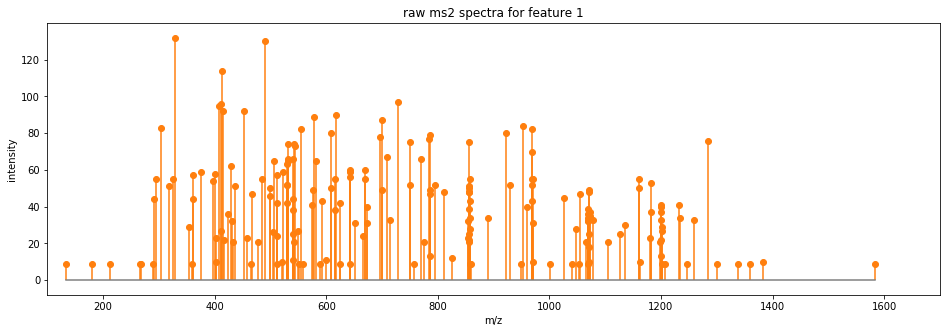

In [42]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(feature_raw_ms2_df.mz, feature_raw_ms2_df.intensity, use_line_collection=True)
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

x_min = 100
x_max = 1700

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(16)
ax.set_xlim((x_min,x_max))
plt.margins(0.06)
plt.title('raw ms2 spectra for feature {}'.format(feature_id))
plt.show()

In [61]:
feature_raw_ms2_df.head(20)

,frame_id,mz,intensity,scaled_mz
0,27938,133.596214,9,133596
1,27938,180.467447,9,180467
2,27938,213.418260,9,213418
3,27938,266.156364,9,266156
4,27938,268.404245,9,268404
5,27938,290.488503,9,290488
6,27938,291.147299,44,291147
7,27938,294.179258,55,294179
8,27938,303.130481,83,303130
9,27938,319.045393,51,319045


In [63]:
raw_spectra_a = np.zeros(feature_raw_ms2_df.scaled_mz.max()+1, dtype=np.int32)
print("allocated {} bytes for the frame array".format(getsizeof(raw_spectra_a)))

allocated 6331152 bytes for the frame array


In [64]:
raw_spectra_a[feature_raw_ms2_df.scaled_mz] = feature_raw_ms2_df.intensity

In [65]:
raw_spectra_a[303130]

83

In [67]:
raw_spectra_a[133595]

0

In [80]:
DELTA_MZ = 1.003355     # Mass difference between Carbon-12 and Carbon-13 isotopes, in Da. For calculating the spacing between isotopic peaks.

In [91]:
isotope_kernel_spacing = int(DELTA_MZ * mz_scaling_factor)
isotope_kernel = np.array([1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1])
fill = np.zeros(isotope_kernel_spacing-len(isotope_kernel), dtype=np.int32)

In [96]:
custom_kernel_a = np.concatenate((np.concatenate((isotope_kernel, fill), axis=0), isotope_kernel), axis=0)
# make sure the kernel length is an odd number
if len(custom_kernel_a) % 2 == 0:
    custom_kernel_a = np.concatenate((custom_kernel_a, np.array([1])), axis=0)

In [97]:
len(custom_kernel_a)

1023

In [98]:
custom_kernel_a

array([1, 2, 3, ..., 2, 1, 1])

In [100]:
from astropy.convolution.kernels import CustomKernel
kernel = CustomKernel(custom_kernel_a)

In [101]:
from astropy.convolution import convolve
result = convolve(raw_spectra_a, kernel)

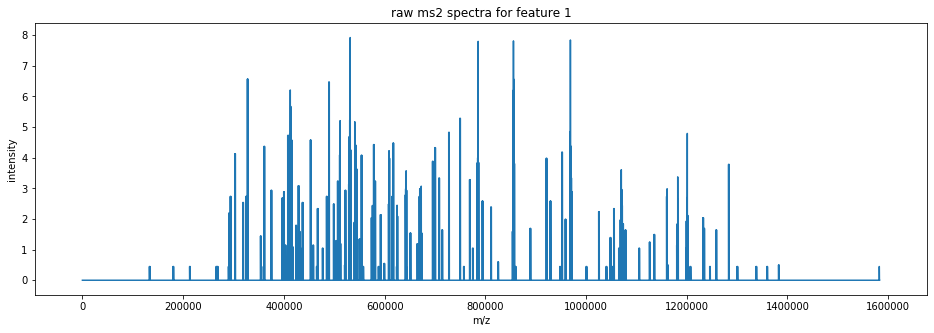

In [106]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

ax.plot(result, color=colors[0])

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(16)
# ax.set_xlim((200000,220000))
plt.margins(0.06)
plt.title('raw ms2 spectra for feature {}'.format(feature_id))
plt.show()